In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error





In [130]:
random_state=42

# Cruide Oil WTI 

## 7:3

In [131]:
df= pd.read_csv('../dataset/Crude Oil.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [132]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1294 non-null   datetime64[ns]
 1   Price     1294 non-null   float64       
 2   Open      1294 non-null   float64       
 3   High      1294 non-null   float64       
 4   Low       1294 non-null   float64       
 5   Vol.      1294 non-null   int64         
 6   Change %  1294 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 70.9 KB


### Tạo hàm Eval

In [134]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [135]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,46.54
1,47.09
2,47.96
3,48.52
4,49.78
...,...
1289,83.47
1290,81.68
1291,81.07
1292,80.63


### Train, Test


In [136]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [137]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [138]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [139]:
eval(y_test,y_pred)

** Testing **
MAE:  19.81338461393448
MAPE:  25.96375415032302
RMSE:  22.15920690354874


### Predict

In [140]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


In [141]:
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)


In [142]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
     

Predicted closing prices for the next 30 days:
[109.81202115 109.86833849 109.92465583 109.98097318 110.03729052
 110.09360787 110.14992521 110.20624255 110.2625599  110.31887724
 110.37519459 110.43151193 110.48782927 110.54414662 110.60046396
 110.6567813  110.71309865 110.76941599 110.82573334 110.88205068
 110.93836802 110.99468537 111.05100271 111.10732005 111.1636374
 111.21995474 111.27627209 111.33258943 111.38890677 111.44522412]


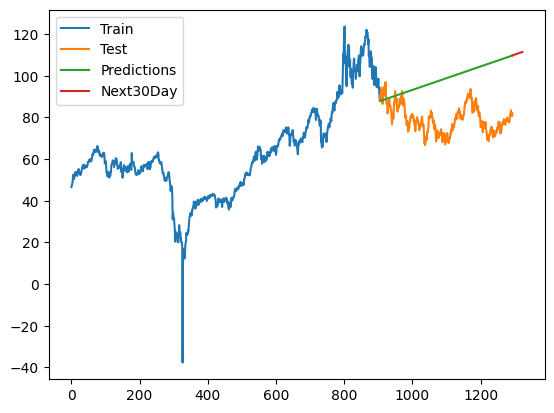

In [143]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Gasoline RBOB

## 7:3

In [144]:
df= pd.read_csv('../dataset/Gasoline RBOB.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [145]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1330 non-null   datetime64[ns]
 1   Price     1330 non-null   float64       
 2   Open      1330 non-null   float64       
 3   High      1330 non-null   float64       
 4   Low       1330 non-null   float64       
 5   Vol.      1330 non-null   int64         
 6   Change %  1330 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 72.9 KB


### Tạo hàm Eval

In [147]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [148]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,1.4150
1,1.4377
2,1.4515
3,1.4505
4,1.4740
...,...
1325,2.7271
1326,2.7398
1327,2.7484
1328,2.7006


### Train, Test


In [149]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [150]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [151]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [152]:
eval(y_test,y_pred)

** Testing **
MAE:  0.22980492111641734
MAPE:  9.935187181655493
RMSE:  0.3119449370590117


### Predict

In [153]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


In [154]:
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)


In [155]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
     

Predicted closing prices for the next 30 days:
[2.86143615 2.86280488 2.86417362 2.86554235 2.86691109 2.86827982
 2.86964856 2.87101729 2.87238603 2.87375477 2.8751235  2.87649224
 2.87786097 2.87922971 2.88059844 2.88196718 2.88333591 2.88470465
 2.88607339 2.88744212 2.88881086 2.89017959 2.89154833 2.89291706
 2.8942858  2.89565453 2.89702327 2.898392   2.89976074 2.90112948]


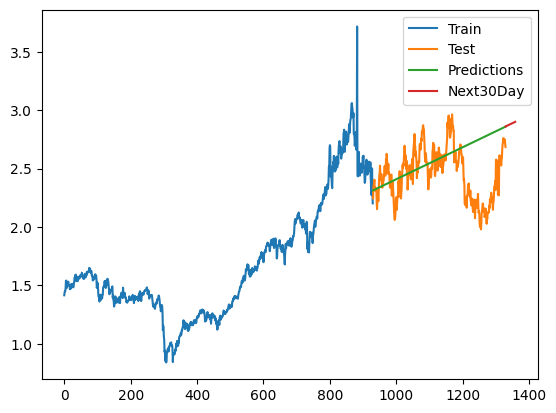

In [156]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Heating Oil

## 7:3

In [157]:
df= pd.read_csv('../dataset/Heating Oil.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [158]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1319 non-null   datetime64[ns]
 1   Price     1319 non-null   float64       
 2   Open      1319 non-null   float64       
 3   High      1319 non-null   float64       
 4   Low       1319 non-null   float64       
 5   Vol.      1319 non-null   int64         
 6   Change %  1319 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 72.3 KB


### Tạo hàm Eval

In [160]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [161]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,1.7006
1,1.7420
2,1.7692
3,1.7784
4,1.8270
...,...
1314,2.6688
1315,2.6534
1316,2.6786
1317,2.6218


### Train, Test


In [162]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [163]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [164]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [165]:
eval(y_test,y_pred)

** Testing **
MAE:  0.6262536068099358
MAPE:  22.59244806928781
RMSE:  0.7050172107541183


### Predict

In [166]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


In [167]:
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)


In [168]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
     

Predicted closing prices for the next 30 days:
[3.75329705 3.75524882 3.75720059 3.75915236 3.76110413 3.7630559
 3.76500766 3.76695943 3.7689112  3.77086297 3.77281474 3.7747665
 3.77671827 3.77867004 3.78062181 3.78257358 3.78452535 3.78647711
 3.78842888 3.79038065 3.79233242 3.79428419 3.79623595 3.79818772
 3.80013949 3.80209126 3.80404303 3.8059948  3.80794656 3.80989833]


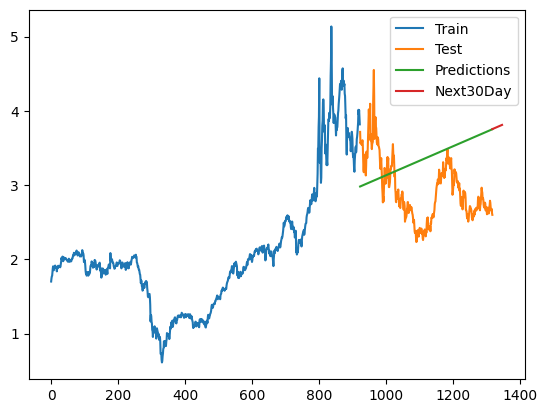

In [169]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error





# Cruide Oil WTI 

## 8:2

In [171]:
df= pd.read_csv('../dataset/Crude Oil.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [172]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1294 non-null   datetime64[ns]
 1   Price     1294 non-null   float64       
 2   Open      1294 non-null   float64       
 3   High      1294 non-null   float64       
 4   Low       1294 non-null   float64       
 5   Vol.      1294 non-null   int64         
 6   Change %  1294 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 70.9 KB


### Tạo hàm Eval

In [174]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [175]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,46.54
1,47.09
2,47.96
3,48.52
4,49.78
...,...
1289,83.47
1290,81.68
1291,81.07
1292,80.63


### Train, Test


In [176]:
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [177]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [178]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [179]:
eval(y_test,y_pred)

** Testing **
MAE:  20.339347619469716
MAPE:  26.935726014911815
RMSE:  21.346876389152897


### Predict

In [180]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


In [181]:
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)


In [182]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
     

Predicted closing prices for the next 30 days:
[104.34282942 104.3934612  104.44409297 104.49472474 104.54535651
 104.59598829 104.64662006 104.69725183 104.7478836  104.79851538
 104.84914715 104.89977892 104.9504107  105.00104247 105.05167424
 105.10230601 105.15293779 105.20356956 105.25420133 105.3048331
 105.35546488 105.40609665 105.45672842 105.5073602  105.55799197
 105.60862374 105.65925551 105.70988729 105.76051906 105.81115083]


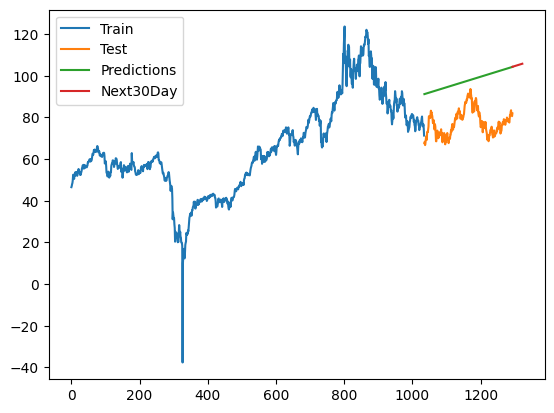

In [183]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Gasoline RBOB

## 8:2

In [184]:
df= pd.read_csv('../dataset/Gasoline RBOB.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [185]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1330 non-null   datetime64[ns]
 1   Price     1330 non-null   float64       
 2   Open      1330 non-null   float64       
 3   High      1330 non-null   float64       
 4   Low       1330 non-null   float64       
 5   Vol.      1330 non-null   int64         
 6   Change %  1330 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 72.9 KB


### Tạo hàm Eval

In [187]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [188]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,1.4150
1,1.4377
2,1.4515
3,1.4505
4,1.4740
...,...
1325,2.7271
1326,2.7398
1327,2.7484
1328,2.7006


### Train, Test


In [189]:
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [190]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [191]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [192]:
eval(y_test,y_pred)

** Testing **
MAE:  0.29505302919770476
MAPE:  12.84651367352081
RMSE:  0.37475492099737145


### Predict

In [193]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


In [194]:
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)


In [195]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
     

Predicted closing prices for the next 30 days:
[2.86925107 2.87062776 2.87200445 2.87338113 2.87475782 2.87613451
 2.8775112  2.87888789 2.88026458 2.88164127 2.88301795 2.88439464
 2.88577133 2.88714802 2.88852471 2.8899014  2.89127808 2.89265477
 2.89403146 2.89540815 2.89678484 2.89816153 2.89953821 2.9009149
 2.90229159 2.90366828 2.90504497 2.90642166 2.90779834 2.90917503]


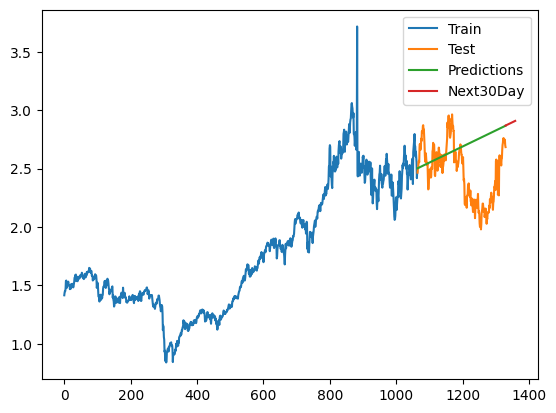

In [196]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Heating Oil

## 8:2

In [197]:
df= pd.read_csv('../dataset/Heating Oil.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [198]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1319 non-null   datetime64[ns]
 1   Price     1319 non-null   float64       
 2   Open      1319 non-null   float64       
 3   High      1319 non-null   float64       
 4   Low       1319 non-null   float64       
 5   Vol.      1319 non-null   int64         
 6   Change %  1319 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 72.3 KB


### Tạo hàm Eval

In [200]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [201]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,1.7006
1,1.7420
2,1.7692
3,1.7784
4,1.8270
...,...
1314,2.6688
1315,2.6534
1316,2.6786
1317,2.6218


### Train, Test


In [202]:
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [203]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [204]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [205]:
eval(y_test,y_pred)

** Testing **
MAE:  0.8351520872136288
MAPE:  31.5202219218106
RMSE:  0.8826505632315859


### Predict

In [206]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


In [207]:
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)


In [208]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
     

Predicted closing prices for the next 30 days:
[3.85986002 3.86191556 3.86397111 3.86602665 3.86808219 3.87013774
 3.87219328 3.87424882 3.87630437 3.87835991 3.88041545 3.88247099
 3.88452654 3.88658208 3.88863762 3.89069317 3.89274871 3.89480425
 3.8968598  3.89891534 3.90097088 3.90302643 3.90508197 3.90713751
 3.90919305 3.9112486  3.91330414 3.91535968 3.91741523 3.91947077]


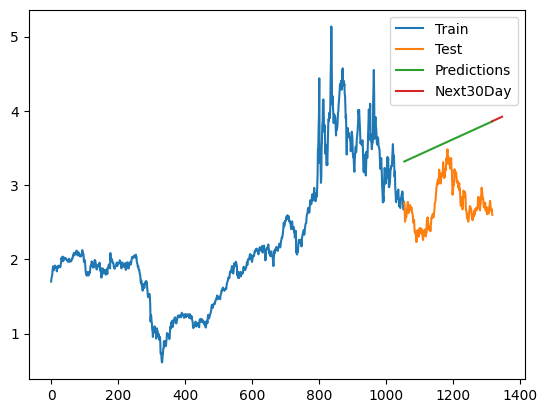

In [209]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Cruide Oil WTI 

## 9:1

In [210]:
df= pd.read_csv('../dataset/Crude Oil.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [211]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1294 non-null   datetime64[ns]
 1   Price     1294 non-null   float64       
 2   Open      1294 non-null   float64       
 3   High      1294 non-null   float64       
 4   Low       1294 non-null   float64       
 5   Vol.      1294 non-null   int64         
 6   Change %  1294 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 70.9 KB


### Tạo hàm Eval

In [213]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [214]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,46.54
1,47.09
2,47.96
3,48.52
4,49.78
...,...
1289,83.47
1290,81.68
1291,81.07
1292,80.63


### Train, Test


In [215]:
# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [216]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [217]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [218]:
eval(y_test,y_pred)

** Testing **
MAE:  14.610678406281002
MAPE:  19.281593412117243
RMSE:  16.013786645021877


### Predict

In [219]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


In [220]:
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)


In [221]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
     

Predicted closing prices for the next 30 days:
[95.79130453 95.83276135 95.87421818 95.915675   95.95713183 95.99858866
 96.04004548 96.08150231 96.12295913 96.16441596 96.20587278 96.24732961
 96.28878644 96.33024326 96.37170009 96.41315691 96.45461374 96.49607057
 96.53752739 96.57898422 96.62044104 96.66189787 96.70335469 96.74481152
 96.78626835 96.82772517 96.869182   96.91063882 96.95209565 96.99355247]


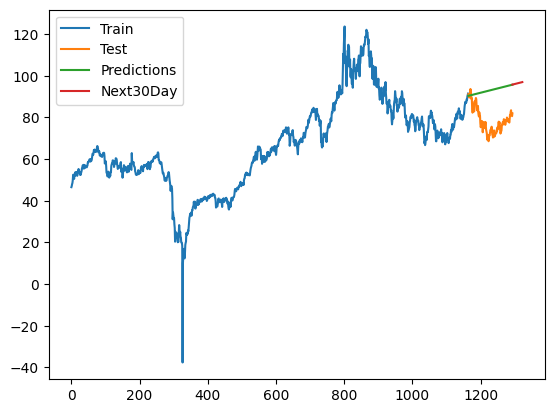

In [222]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Gasoline RBOB

## 9:1

In [223]:
df= pd.read_csv('../dataset/Gasoline RBOB.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [224]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1330 non-null   datetime64[ns]
 1   Price     1330 non-null   float64       
 2   Open      1330 non-null   float64       
 3   High      1330 non-null   float64       
 4   Low       1330 non-null   float64       
 5   Vol.      1330 non-null   int64         
 6   Change %  1330 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 72.9 KB


### Tạo hàm Eval

In [226]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [227]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,1.4150
1,1.4377
2,1.4515
3,1.4505
4,1.4740
...,...
1325,2.7271
1326,2.7398
1327,2.7484
1328,2.7006


### Train, Test


In [228]:
# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [229]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [230]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [231]:
eval(y_test,y_pred)

** Testing **
MAE:  0.4921830774750309
MAPE:  22.16687938540278
RMSE:  0.5251844750410608


### Predict

In [232]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


In [233]:
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)


In [234]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
     

Predicted closing prices for the next 30 days:
[2.88760199 2.88899766 2.89039333 2.891789   2.89318467 2.89458034
 2.89597601 2.89737168 2.89876735 2.90016302 2.90155869 2.90295436
 2.90435003 2.9057457  2.90714137 2.90853704 2.90993271 2.91132838
 2.91272405 2.91411972 2.91551539 2.91691107 2.91830674 2.91970241
 2.92109808 2.92249375 2.92388942 2.92528509 2.92668076 2.92807643]


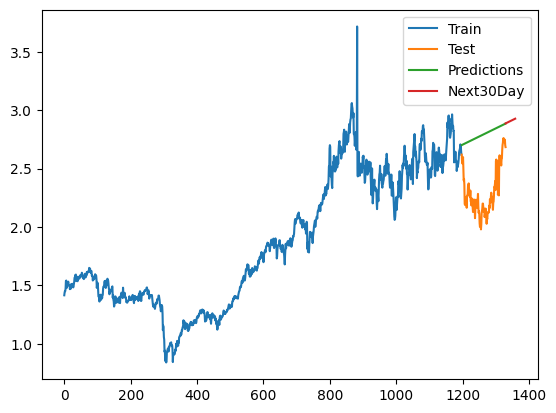

In [235]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Heating Oil

## 9:1

In [236]:
df= pd.read_csv('../dataset/Heating Oil.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [237]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1319 non-null   datetime64[ns]
 1   Price     1319 non-null   float64       
 2   Open      1319 non-null   float64       
 3   High      1319 non-null   float64       
 4   Low       1319 non-null   float64       
 5   Vol.      1319 non-null   int64         
 6   Change %  1319 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 72.3 KB


### Tạo hàm Eval

In [239]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [240]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,1.7006
1,1.7420
2,1.7692
3,1.7784
4,1.8270
...,...
1314,2.6688
1315,2.6534
1316,2.6786
1317,2.6218


### Train, Test


In [241]:
# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [242]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [243]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [244]:
eval(y_test,y_pred)

** Testing **
MAE:  0.5758738103408654
MAPE:  21.162049395615483
RMSE:  0.6278433416737745


### Predict

In [245]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


In [246]:
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)


In [247]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
     

Predicted closing prices for the next 30 days:
[3.50067873 3.50235686 3.50403499 3.50571312 3.50739125 3.50906938
 3.5107475  3.51242563 3.51410376 3.51578189 3.51746002 3.51913815
 3.52081627 3.5224944  3.52417253 3.52585066 3.52752879 3.52920691
 3.53088504 3.53256317 3.5342413  3.53591943 3.53759756 3.53927568
 3.54095381 3.54263194 3.54431007 3.5459882  3.54766633 3.54934445]


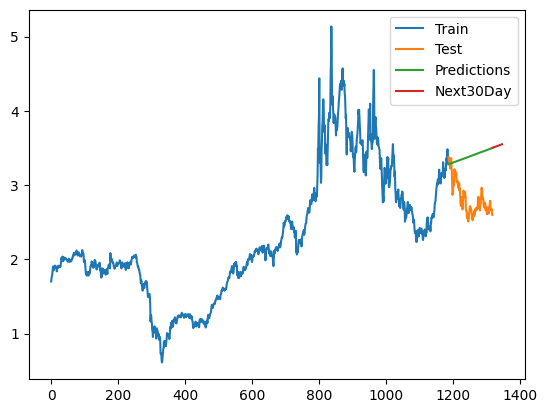

In [248]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()